<a href="https://colab.research.google.com/github/silveirafatup-maker/DIO/blob/main/treina_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criação e treinamento modelo Yolo
YOLOv8 + COCO128

In [1]:
# INSTALAÇÃO OBRIGATÓRIA PARA O COLAB
!pip install ultralytics

import os
import shutil
from pathlib import Path
from ultralytics import YOLO
from IPython.display import Image, display
from PIL import Image as PImage
import warnings

# Suprime warnings do PyTorch/Ultralytics sobre re-uso do código
warnings.filterwarnings("ignore", category=UserWarning)

# CONFIGURAÇÕES GLOBAIS
NOME_DO_PROJETO = "yolo_resultados_coco_small"
MODELO_BASE = 'yolov8s.pt'
TEST_IMAGE_LOCAL_PATH = Path('/content/zidane.jpg')
TEST_IMAGE_URL = "https://ultralytics.com/images/zidane.jpg"
RUNS_DIR = Path('/content/runs/detect')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Garante que a imagem de teste esteja baixada no início
if not TEST_IMAGE_LOCAL_PATH.exists():
    print(f"Baixando imagem de teste: {TEST_IMAGE_LOCAL_PATH}")
    os.system(f"wget {TEST_IMAGE_URL} -O {TEST_IMAGE_LOCAL_PATH}")


In [2]:
# Otimização: Carrega 'last.pt' se o projeto já existe para continuar o treino.
MODELO_TREINADO_PATH = Path(NOME_DO_PROJETO) / 'experimento_small_25e' / 'weights' / 'last.pt'

if MODELO_TREINADO_PATH.exists():
    print(f"Carregando modelo 'last.pt' para continuação: {MODELO_TREINADO_PATH} ---")
    model = YOLO(str(MODELO_TREINADO_PATH))
else:
    print(f"Carregando modelo base '{MODELO_BASE}' para iniciar o treino")
    model = YOLO(MODELO_BASE)

print(f"Iniciando/Continuando treinamento YOLOv8 ({model.yaml.get('model_name', MODELO_BASE)} + COCO128)")

#  Treinamento Estendido - 25 épocas
# O YOLO gerencia o download do dataset 'coco128' e o armazena em cache
results = model.train(
    data='coco128.yaml',
    epochs=5,    # evitar demora no processamento
    imgsz=640,
    batch=16,
    workers=8,
    project=NOME_DO_PROJETO,
    name='experimento_small_25e',
    plots=True,
    device='0',  # 'cpu'
    # exist_ok=True: Retoma o treino se a pasta do projeto/nome já existir
    exist_ok=True,
)

print("\n Treinamento Concluído ou Retomado!")


Carregando modelo base 'yolov8s.pt' para iniciar o treino
Iniciando/Continuando treinamento YOLOv8 (yolov8s.pt + COCO128)
Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=experimento_small_25e, nbs=64, nms=Fa


Caminho Dinâmico dos Resultados do Experimento: /content/yolo_resultados_coco_small/experimento_small_25e

 Amostras do Dataset (Ground Truth)
Amostra de Treino:


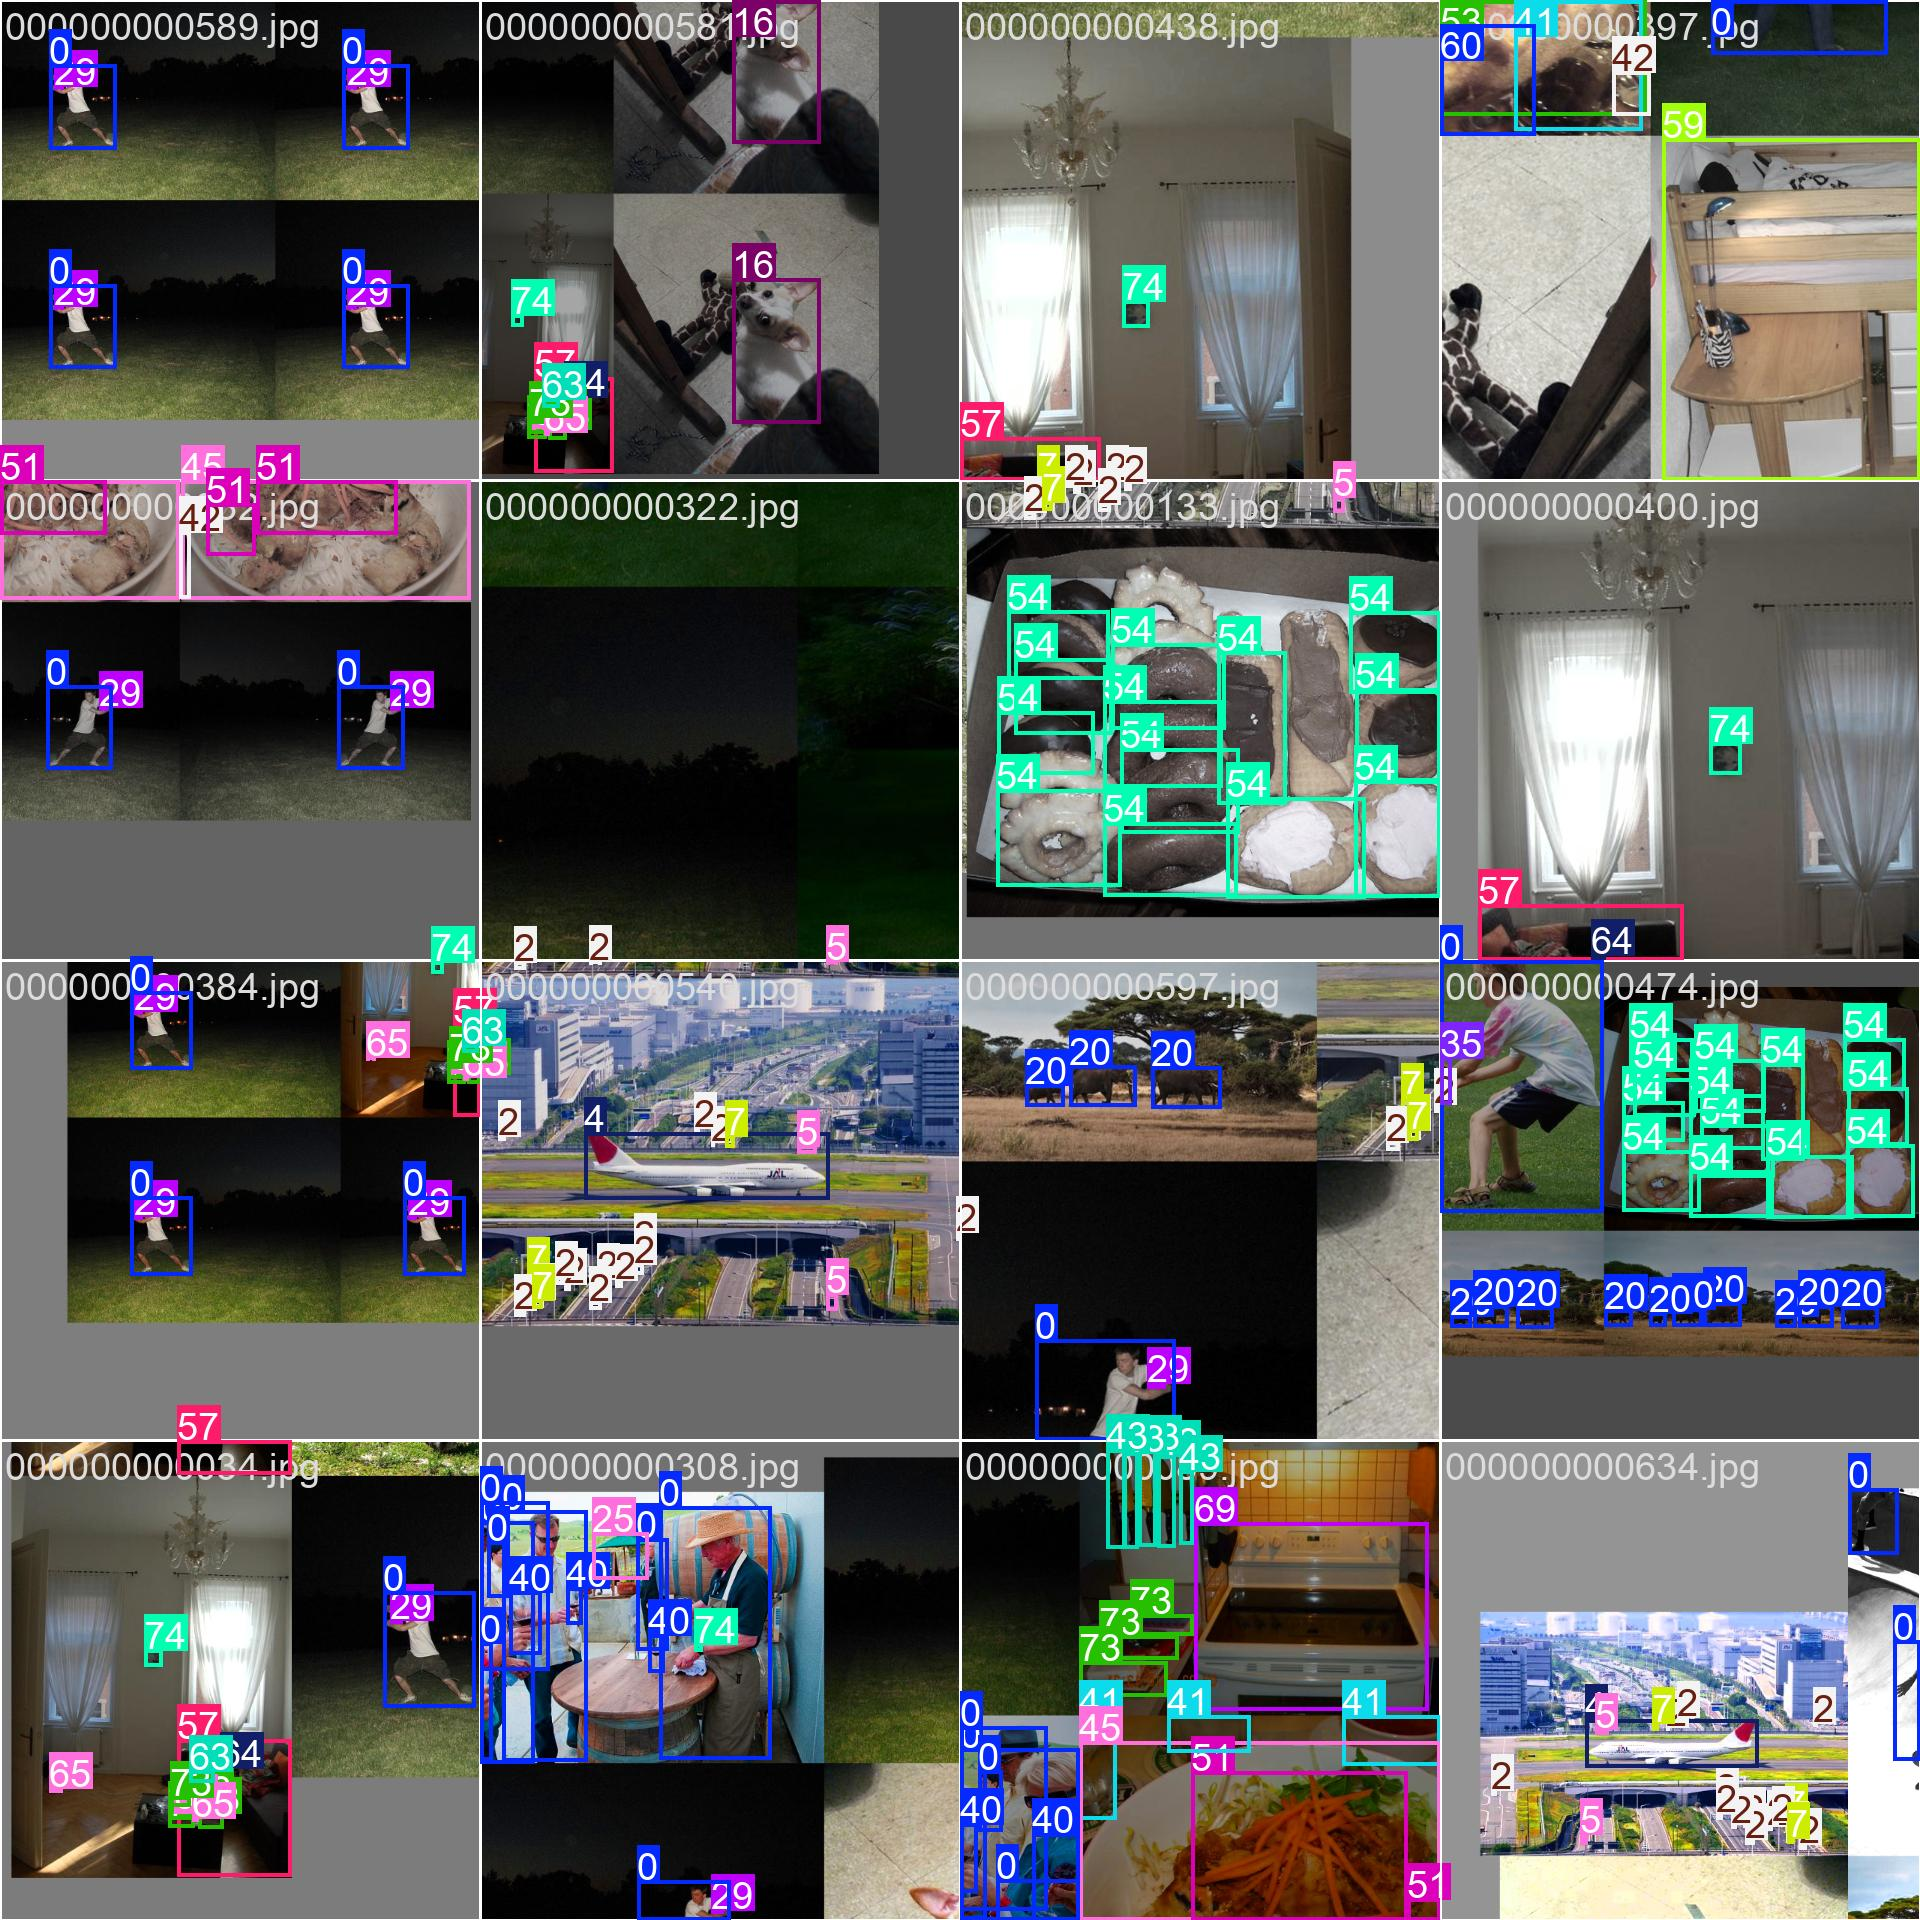


 Gráficos de Métricas e Performance
Gráfico de Resultados (Loss, mAP):


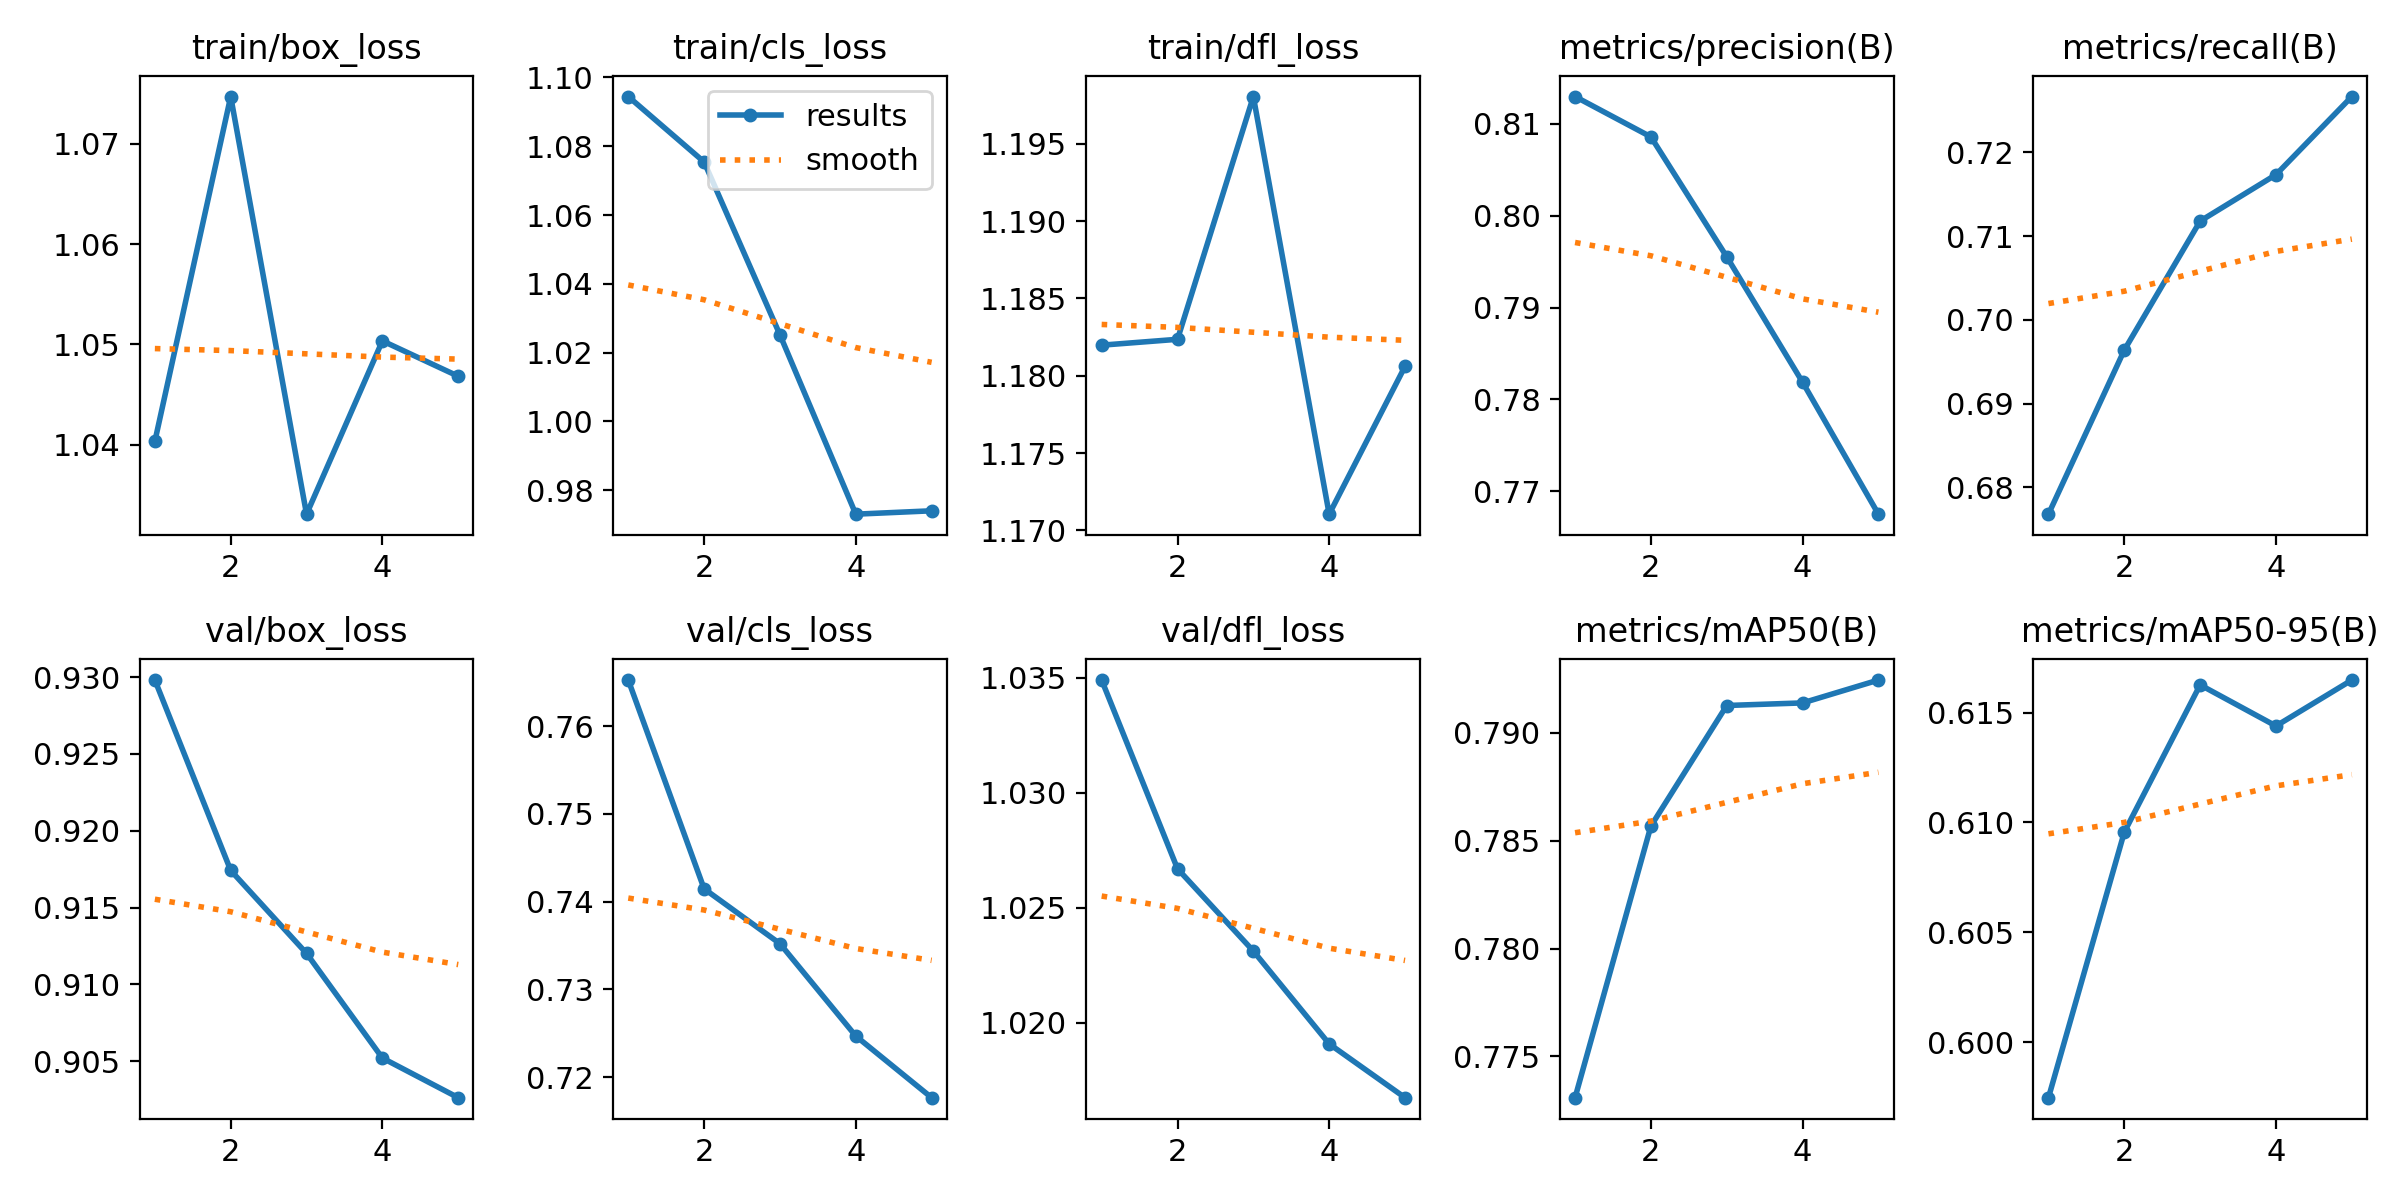

Matriz de Confusão:


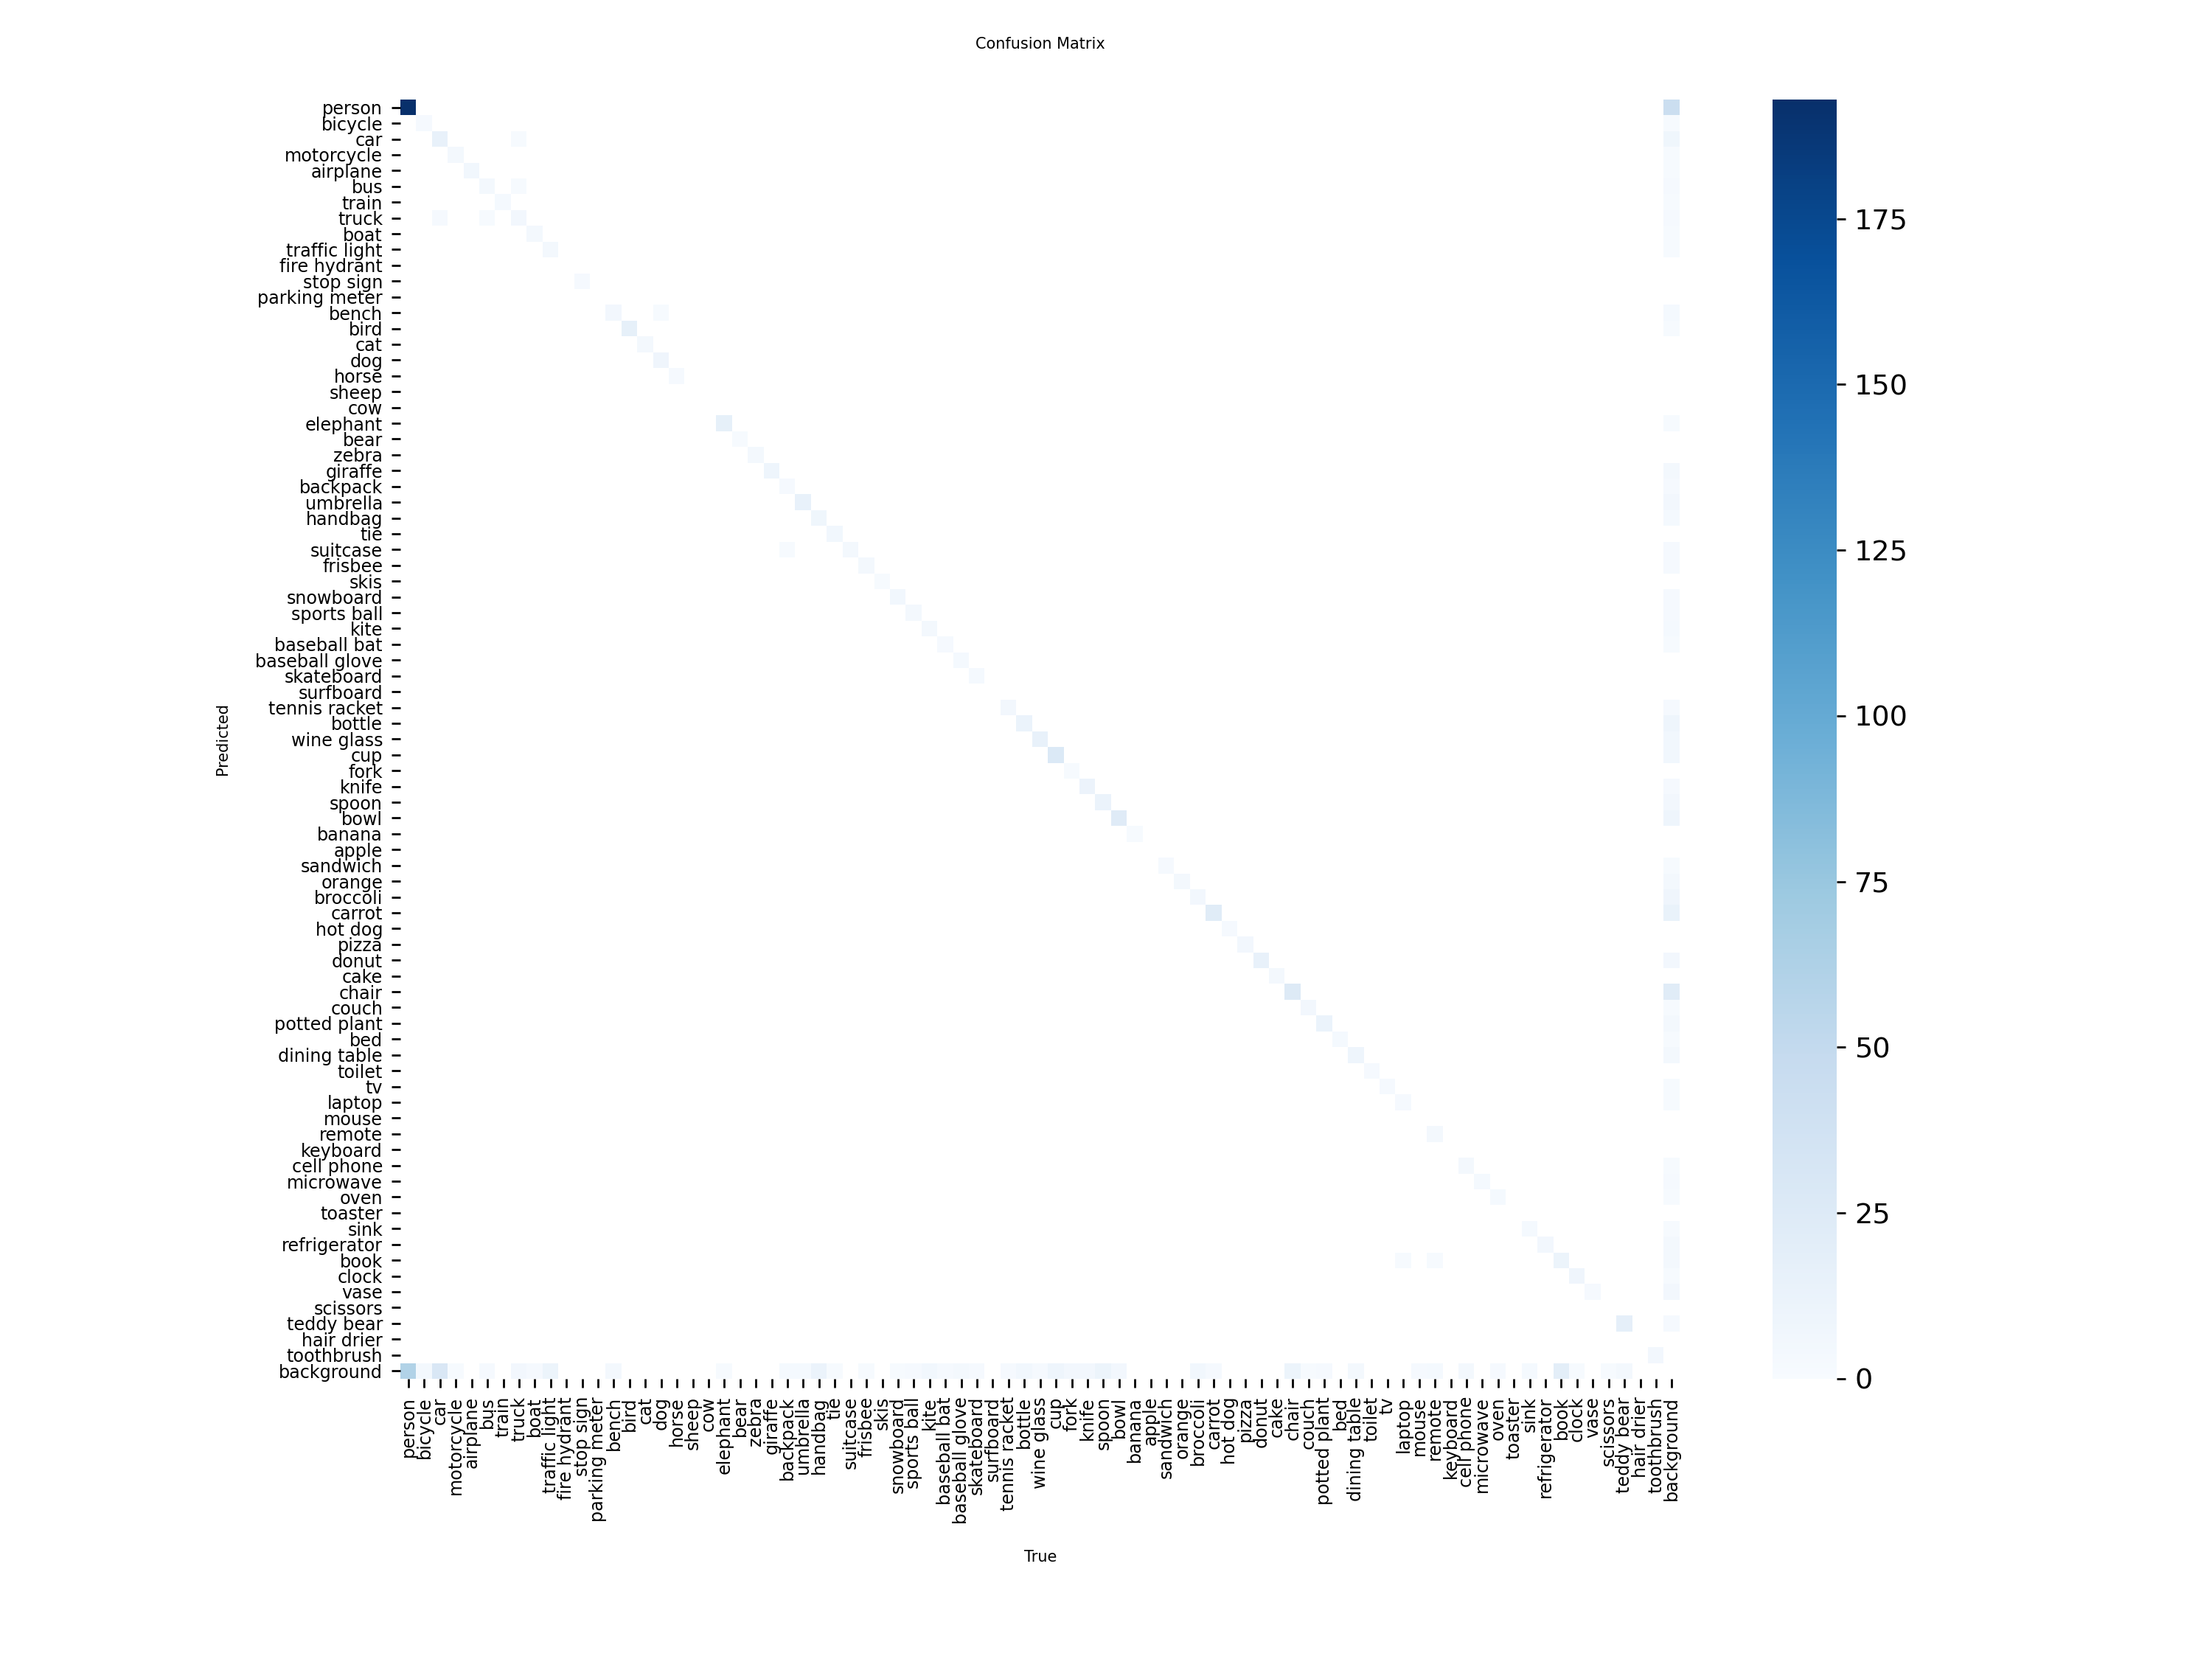

In [3]:
# Análise e Visualização dos Resultados

RESULTADOS_PATH = Path(results.save_dir)
print(f"\nCaminho Dinâmico dos Resultados do Experimento: {RESULTADOS_PATH}\n")

# Visualizar Amostras do Dataset (Ground Truth)

print(" Amostras do Dataset (Ground Truth)")

train_sample_path = RESULTADOS_PATH / 'train_batch0.jpg'
val_sample_path = RESULTADOS_PATH / 'val_batch0.jpg'

if train_sample_path.exists():
    print("Amostra de Treino:")
    display(Image(filename=train_sample_path, width=800))

if val_sample_path.exists():
    print("Amostra de Validação:")
    display(Image(filename=val_sample_path, width=800))

#Visualizar Resultados de Treinamento e Métricas

print("\n Gráficos de Métricas e Performance")
results_plot_path = RESULTADOS_PATH / 'results.png'
confusion_matrix_path = RESULTADOS_PATH / 'confusion_matrix.png'

if results_plot_path.exists():
    print("Gráfico de Resultados (Loss, mAP):")
    display(Image(filename=results_plot_path, width=800))

if confusion_matrix_path.exists():
    print("Matriz de Confusão:")
    display(Image(filename=confusion_matrix_path, width=800))



 Inferência do Modelo Final (Detecção em uma Imagem)
 Executando inferência na imagem local: /content/zidane.jpg
Results saved to /content/runs/predict/inferencia_final

Visualizando a Imagem Original:


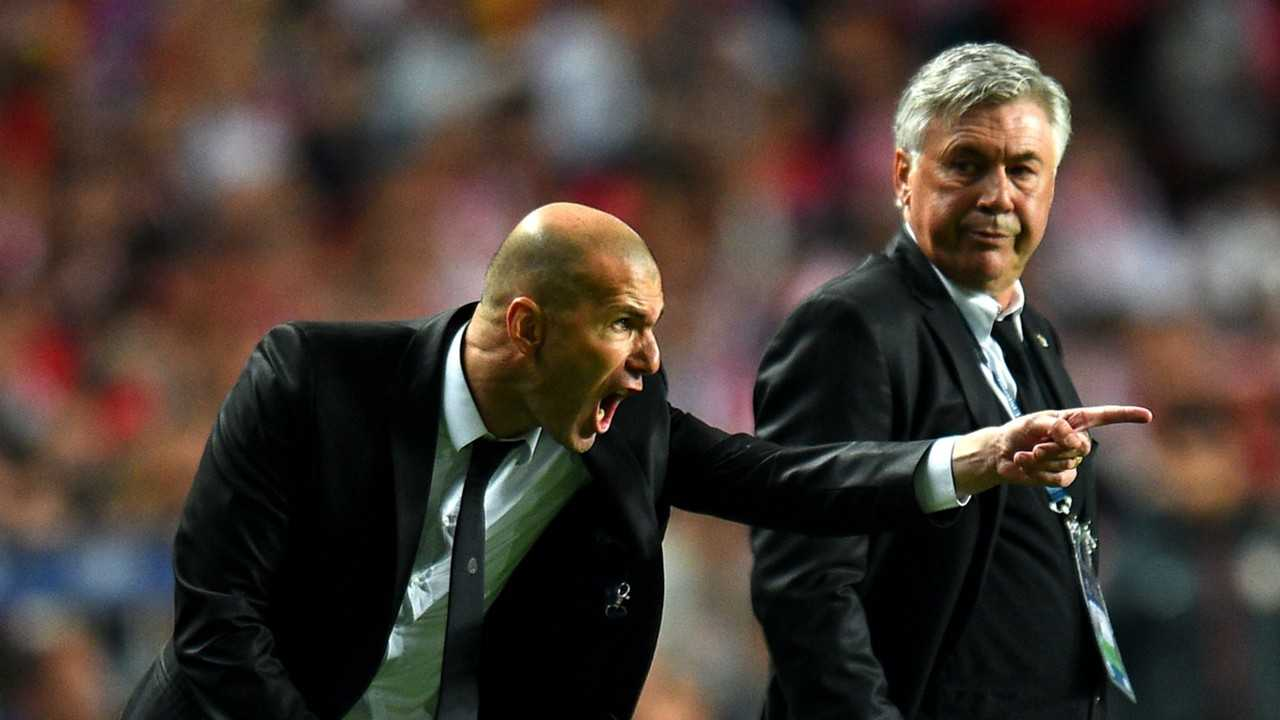


Visualizando o Resultado da Detecção:


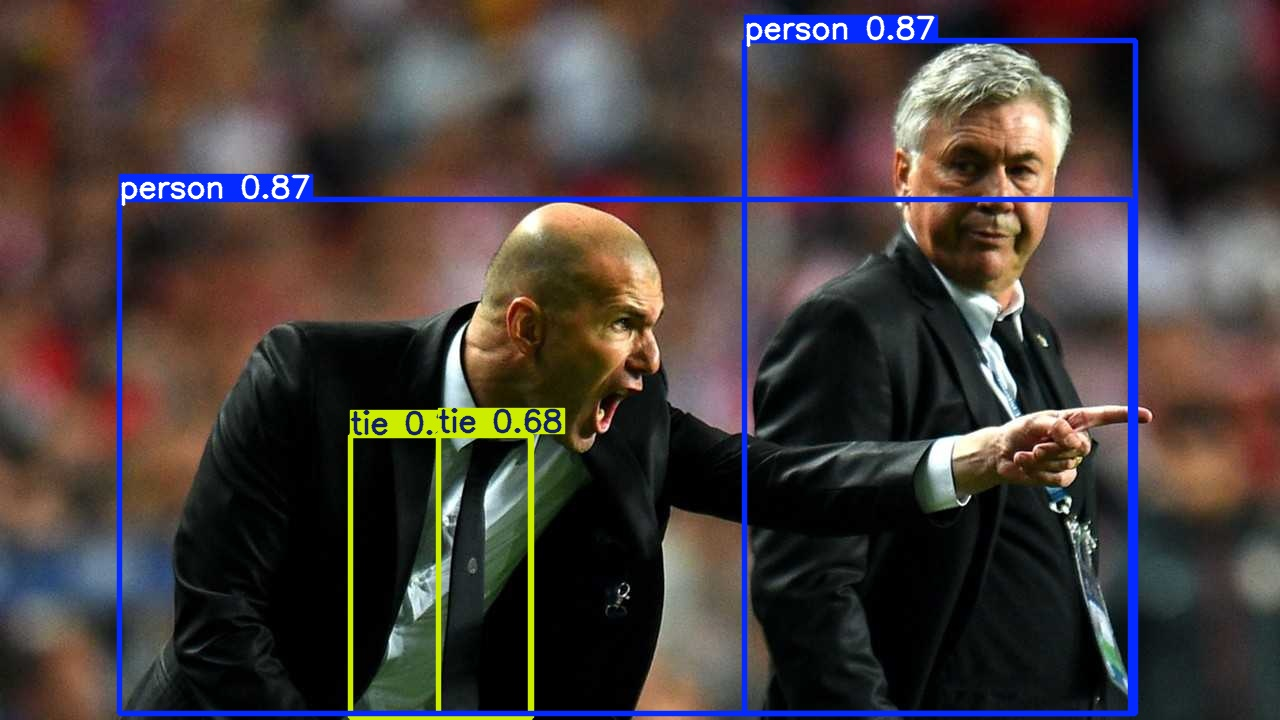

In [8]:
# Visualizar a Inferência do Modelo Final

print("\n Inferência do Modelo Final (Detecção em uma Imagem)")

model_path = RESULTADOS_PATH / 'weights' / 'best.pt'
if model_path.exists():
    # Carregamos o modelo 'best.pt' para a inferência final
    final_model = YOLO(model_path)

    # Limpa a pasta de inferência antiga e executa a nova
    INFERENCIA_DIR = Path('runs/predict/inferencia_final')
    if INFERENCIA_DIR.exists():
        shutil.rmtree(INFERENCIA_DIR)

    print(f" Executando inferência na imagem local: {TEST_IMAGE_LOCAL_PATH}")

    final_model.predict(
        source=TEST_IMAGE_LOCAL_PATH,
        save=True,
        conf=0.25,
        project='runs/predict',
        name='inferencia_final',
        exist_ok=True,
        verbose=False
    )

    # O nome do arquivo salvo é o nome base da imagem, que é "zidane.jpg"
    inferencia_path = INFERENCIA_DIR / TEST_IMAGE_LOCAL_PATH.name

    if inferencia_path.exists():
        # exibir imagem original
        print("\nVisualizando a Imagem Original:")
        try:
            img_original = PImage.open(TEST_IMAGE_LOCAL_PATH)
            display(img_original)
        except Exception:
            pass

        # exibir imagem com detecções
        print("\nVisualizando o Resultado da Detecção:")
        display(Image(filename=inferencia_path, width=640))

    else:
        print("Erro ao encontrar o resultado da inferência no diretório de saída.")
else:
    print(f"ERRO: Modelo final (best.pt) não foi salvo corretamente em: {model_path}.")


##Resumo do Código

O código utilizado é um script completo para treinamento e visualização de um modelo YOLOv8 para detecção de objetos, focado em eficiência e análise de resultados.

Instalação e Setup: Instala a biblioteca ultralytics e importa módulos de visualização (PIL, IPython.display).

Carregamento Inteligente: O código verifica se um modelo parcialmente treinado (last.pt) já existe no diretório do projeto e o carrega para retomar o treinamento, caso contrário, inicia com o modelo yolov8s.pt pré-treinado.

Treinamento: Treina (ou retoma o treino) o modelo por 5 épocas usando o pequeno dataset coco128.yaml. O processo foi otimizado para usar a T4 GPU (device=0), garantindo alta velocidade.

Análise de Resultados: Exibe gráficos de métricas (results.png, confusion_matrix.png) e amostras do dataset (Ground Truth).

Inferência Final: Carrega o modelo final (best.pt), executa a detecção em uma imagem de teste (zidane.jpg) e exibe o resultado lado a lado com a imagem original.